# Convert data to EPOCHES

In [100]:
# Notebook 2
from pickleshare import PickleShareDB
db = PickleShareDB('./tmp')
raw = db['raw']
originalRaw = db['originalRaw']


### Test if we have our Raw Data

In [101]:
print(len(raw))
print(type(raw))
print(len(originalRaw))
print(type(originalRaw))

120000
<class 'mne.io.edf.edf.RawEDF'>
120000
<class 'mne.io.edf.edf.RawEDF'>


#### الحمد لله

## What are EPOCHES ?
In the context of EEG (Electroencephalogram) data analysis, an epoch refers to a segment of the continuous EEG recording that is time-locked to a specific event or stimulus. Epoching is a technique where the continuous EEG signal is divided into smaller, non-overlapping time windows, each centered around a particular event or marker.

Here's a brief explanation:

- **Epoching:**
  - **Purpose:** To extract and analyze EEG activity related to specific experimental events or conditions.
  - **Process:** The continuous EEG signal is divided into epochs, typically centered around events of interest, such as stimulus onset or response.
  - **Duration:** Each epoch is a fixed time window, capturing EEG activity before and after the event.
  - **Analysis:** Epochs can be averaged across trials to create event-related potentials (ERPs), revealing patterns of brain activity related to specific stimuli or tasks.

For example, in a visual experiment where participants respond to the presentation of a stimulus, epochs might be centered around the onset of the visual stimulus. This allows researchers to analyze the EEG activity associated with the processing of that stimulus.

Epoching is a fundamental step in EEG preprocessing for event-related analyses, providing a way to focus on specific time periods of interest and improving the signal-to-noise ratio for subsequent analysis.

In [205]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

import matplotlib.pyplot as plt


from mne.viz import plot_events
from mne import Epochs
mne.set_log_level("CRITICAL")
plt.figure(figsize=(100, 6))


<Figure size 10000x600 with 0 Axes>

<Figure size 10000x600 with 0 Axes>

## What we need ?
fo epoching data we need events markers, Usually these are stored in the `raw` object (in MNE) in a stimulus channels.

In [194]:
# mne.find_events?

In [195]:
[events, events_ids] = mne.events_from_annotations(raw)
# mne.find_events(originalRaw)

`events` is simply an array (time in samples, zero, event trigered)

In [196]:
events[0:10]

array([[   0,    0,    5],
       [ 672,    0,    2],
       [1328,    0,    5],
       [2000,    0,    1],
       [2656,    0,    5],
       [3328,    0,    2],
       [3984,    0,    5],
       [4656,    0,    1],
       [5312,    0,    5],
       [5984,    0,    2]])

{'do/feet': 1, 'do/hands': 2, 'imagine/feet': 3, 'imagine/hands': 4, 'rest': 5}


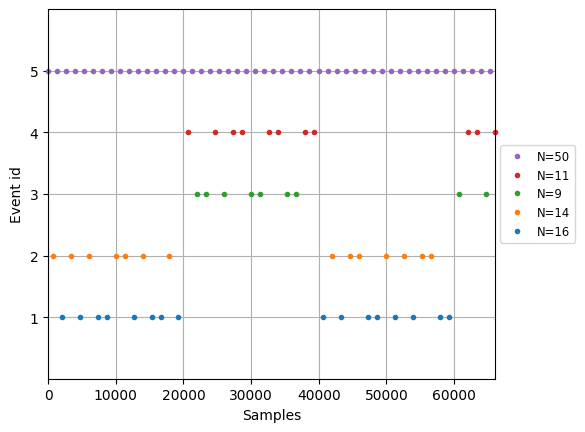

''

In [197]:
print(events_ids)
plot_events(events[:100])
;

In [262]:
epochs = Epochs(raw, events, event_id=events_ids, preload=True)
epochs

Number of events,174
Events,do/feet: 23do/hands: 22imagine/feet: 21imagine/hands: 24rest: 84
Time range,-0.200 – 0.500 s
Baseline,-0.200 – 0.000 s


In [199]:
print(epochs.info)

<Info | 9 non-empty values
 bads: []
 ch_names: FC5, FC3, FC1, FCz, FC2, FC4, FC6, C5, C3, C1, Cz, C2, C4, C6, ...
 chs: 64 EEG
 custom_ref_applied: False
 dig: 67 items (3 Cardinal, 64 EEG)
 highpass: 5.0 Hz
 lowpass: 20.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
 subject_info: 3 items (dict)
>


In [249]:
# epochs.plot(n_channels=10, scalings=dict(eeg=50e-6))
# ;

============================================================[ imagine/hands ]============================================================


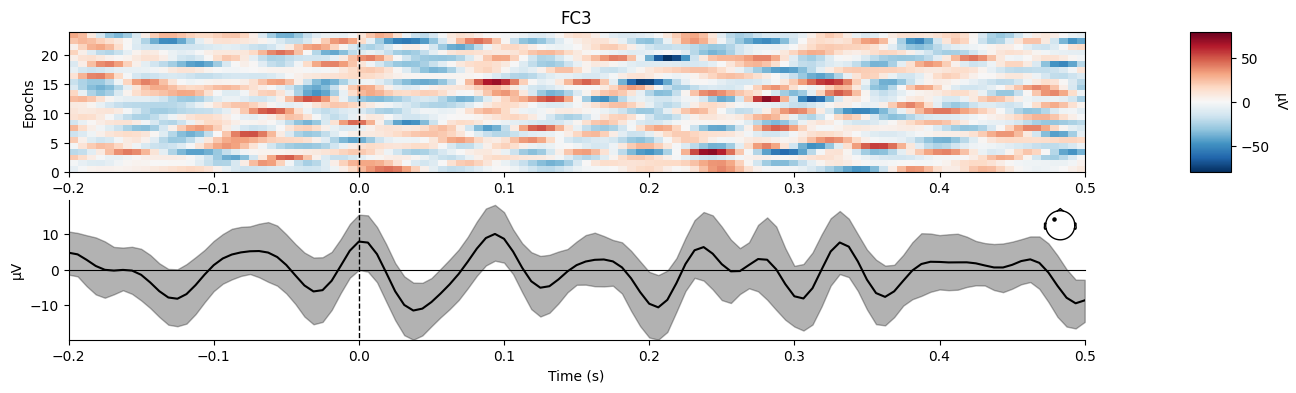

============================================================[ do/hands ]============================================================


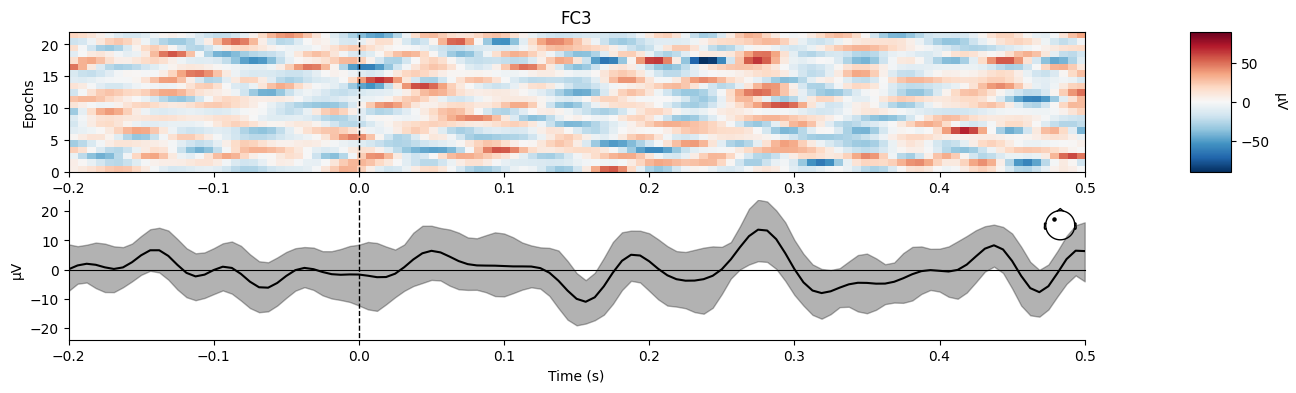

''

In [261]:
channelIdx = [1]
print("===" * 20 + "[ imagine/hands ]" + "===" * 20)
fgSize = (15, 4)
fig, axes = plt.subplots(figsize=fgSize, nrows=2, ncols=2, gridspec_kw={'width_ratios': [5, 0.2]})
# Plot the main image in the first frame of axes
# epochs["imagine/hands"].plot_image(picks=[13], axes=axes[0, 0])
# Remove the second column (axes[:, 1]) to leave space for axes2
for ax in axes[:, 1]:
    ax.remove()
# Create axes2 in the second row and second column
axes2 = plt.subplot(2, 2, 2)
# axes2.set_axis_off()  # Hide axes2 for plotting
# Pass axes_list to plot_image
epochs["imagine/hands"].plot_image(picks=channelIdx, fig=fig)
print("===" * 44)
print("===" * 20 + "[ do/hands ]" + "===" * 20)
fig, axes = plt.subplots(figsize=fgSize, nrows=2, ncols=2, gridspec_kw={'width_ratios': [5, 0.2]})
for ax in axes[:, 1]:
    ax.remove()
axes2 = plt.subplot(2, 2, 2)
epochs["do/hands"].plot_image(picks=channelIdx, fig=fig)
;